# importing librarires

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score      # evaluation metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict

In [3]:
from sklearn.metrics import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions

In [4]:
#df=pd.read_table('parkinsons.data', sep=',')
df=pd.read_csv('pd_speech_features.csv')

In [5]:
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


In [7]:
df.shape

(756, 755)

In [8]:
df.drop('id',axis=1, inplace=True)

In [9]:
df.isna().sum()

gender                       0
PPE                          0
DFA                          0
RPDE                         0
numPulses                    0
                            ..
tqwt_kurtosisValue_dec_33    0
tqwt_kurtosisValue_dec_34    0
tqwt_kurtosisValue_dec_35    0
tqwt_kurtosisValue_dec_36    0
class                        0
Length: 754, dtype: int64

In [10]:
df.duplicated().sum()

1

In [11]:
df=df.drop_duplicates()

In [12]:
#df.status.value_counts()
df['class'].value_counts()

1    563
0    192
Name: class, dtype: int64

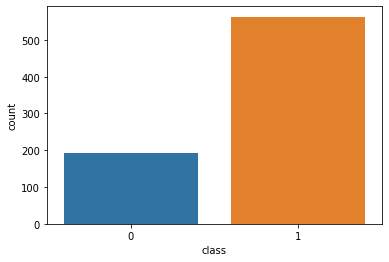

In [13]:
import seaborn as sns
sns.countplot(df['class'])

# Remvol of correlated feature

In [14]:
correlated_features = set()
correlation_matrix = df.drop('class', axis=1).corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [15]:
correlated_features


{'Ea2',
 'Ed2_10_coef',
 'Ed2_1_coef',
 'Ed2_2_coef',
 'Ed2_3_coef',
 'Ed2_4_coef',
 'Ed2_5_coef',
 'Ed2_6_coef',
 'Ed2_7_coef',
 'Ed2_8_coef',
 'Ed2_9_coef',
 'Ed_10_coef',
 'Ed_2_coef',
 'Ed_3_coef',
 'Ed_5_coef',
 'Ed_6_coef',
 'Ed_8_coef',
 'Ed_9_coef',
 'GNE_NSR_TKEO',
 'IMF_NSR_entropy',
 'VFER_entropy',
 'app_LT_TKEO_mean_10_coef',
 'app_LT_TKEO_mean_2_coef',
 'app_LT_TKEO_mean_3_coef',
 'app_LT_TKEO_mean_4_coef',
 'app_LT_TKEO_mean_5_coef',
 'app_LT_TKEO_mean_6_coef',
 'app_LT_TKEO_mean_7_coef',
 'app_LT_TKEO_mean_8_coef',
 'app_LT_TKEO_mean_9_coef',
 'app_LT_TKEO_std_10_coef',
 'app_LT_TKEO_std_1_coef',
 'app_LT_TKEO_std_2_coef',
 'app_LT_TKEO_std_3_coef',
 'app_LT_TKEO_std_4_coef',
 'app_LT_TKEO_std_5_coef',
 'app_LT_TKEO_std_6_coef',
 'app_LT_TKEO_std_7_coef',
 'app_LT_TKEO_std_8_coef',
 'app_LT_TKEO_std_9_coef',
 'app_LT_entropy_log_10_coef',
 'app_LT_entropy_log_1_coef',
 'app_LT_entropy_log_2_coef',
 'app_LT_entropy_log_3_coef',
 'app_LT_entropy_log_4_coef',
 'app_LT_entr

In [16]:
len(correlated_features)

472

In [17]:
df.drop(correlated_features, axis=1, inplace=True)


In [18]:
df.shape

(755, 282)

In [19]:
df['class'].value_counts()

1    563
0    192
Name: class, dtype: int64

# Balancing the dataset

In [20]:
from sklearn.utils import resample

In [21]:
# Separate majority and minority classes
df_majority = df[df['class']==1]
df_minority = df[df['class']==0]
 

In [22]:
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=563,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled['class'].value_counts()

1    563
0    563
Name: class, dtype: int64

In [23]:
df_upsampled.isna().sum()

gender                       0
PPE                          0
DFA                          0
RPDE                         0
numPulses                    0
                            ..
tqwt_kurtosisValue_dec_26    0
tqwt_kurtosisValue_dec_27    0
tqwt_kurtosisValue_dec_28    0
tqwt_kurtosisValue_dec_30    0
class                        0
Length: 282, dtype: int64

In [24]:
X=df_upsampled.drop('class', axis=1)
X.values
y=df_upsampled['class'].values


In [25]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

In [26]:
# Split into train and test sets
random_seed=123
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Feature Dimention Reduction by LDA or Is it a Classifier

In [27]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [28]:
lda = LDA(n_components=8)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

C:\Users\fa14m\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(281, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
C:\Users\fa14m\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


In [29]:
X_train_lda.shape, X_test_lda.shape

((788, 1), (338, 1))

# Cross validation 

In [30]:
from sklearn.model_selection import cross_val_score


# Random Forest Model_LDA

In [31]:
clf=RandomForestClassifier()


In [32]:
clf.fit(X_train_lda, y_train)
y_pred=clf.predict(X_test_lda)
y_pred = cross_val_predict(clf, X, y, cv=5)

In [33]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
print(f"The cross-validated accuracy is: {np.mean(cv_acc):.3f}")

The cross-validated accuracy is: 0.948


In [34]:
np.random.seed(42)
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
print(f"The cross-validated precision is: {np.mean(cv_precision):.3f}")

The cross-validated precision is: 0.961


In [35]:
np.random.seed(42)
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
print(f"The cross-validated recall is: {np.mean(cv_recall):.3f}")

The cross-validated recall is: 0.936


In [36]:
np.random.seed(42)
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
print(f"The cross-validated F1 score is: {np.mean(cv_f1):.3f}")

The cross-validated F1 score is: 0.948


In [37]:
print(y)
print(y_pred)

[1 1 1 ... 0 0 0]
[1 1 1 ... 0 0 0]


In [38]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y, y_pred)
print(conf_mat)

[[543  20]
 [ 36 527]]


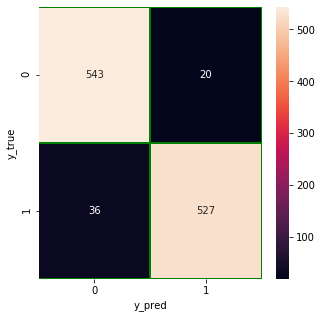

In [39]:
#confusion matrix visualization
import seaborn as sns
import matplotlib.pyplot as plt

f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.7,linecolor="green",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# KNN-LDA

In [40]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)


In [41]:
classifier.fit(X_train_lda, y_train)

knn_prediction = cross_val_predict(classifier, X, y, cv=5)

In [42]:
np.random.seed(42)
cv_acc = cross_val_score(classifier, X, y, cv=5, scoring="accuracy")
print(f"The cross-validated accuracy is: {np.mean(cv_acc):.3f}%")

The cross-validated accuracy is: 0.882%


In [43]:
np.random.seed(42)
cv_precision = cross_val_score(classifier, X, y, cv=5, scoring="precision")
print(f"The cross-validated precision is: {np.mean(cv_precision):.3f}")

The cross-validated precision is: 0.928


In [44]:
np.random.seed(42)
cv_recall = cross_val_score(classifier, X, y, cv=5, scoring="recall")
print(f"The cross-validated recall is: {np.mean(cv_recall):.3f}")

The cross-validated recall is: 0.828


In [45]:
np.random.seed(42)
cv_f1 = cross_val_score(classifier, X, y, cv=5, scoring="f1")
print(f"The cross-validated F1 score is: {np.mean(cv_f1):.3f}")

The cross-validated F1 score is: 0.875


In [46]:
from sklearn.metrics import confusion_matrix
knn_conf_mat = confusion_matrix(y, knn_prediction)
print(knn_conf_mat)

[[527  36]
 [ 97 466]]


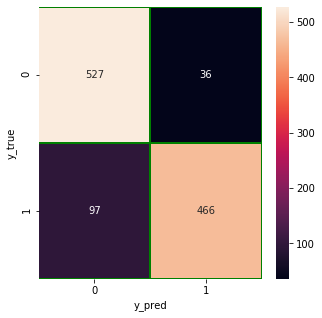

In [47]:
#confusion matrix visualization
import seaborn as sns
import matplotlib.pyplot as plt

f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(knn_conf_mat,annot=True,linewidths=0.7,linecolor="green",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# Logistic Regression-LDA

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
lr= LogisticRegression()

In [50]:
lr.fit(X_train_lda, y_train)

lr_prediction = cross_val_predict(lr, X, y, cv=5);

C:\Users\fa14m\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\fa14m\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

In [51]:
np.random.seed(42)
cv_acc = cross_val_score(lr, X, y, cv=5, scoring="accuracy")
print(f"The cross-validated accuracy is: {np.mean(cv_acc):.3f}%")

C:\Users\fa14m\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\fa14m\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

The cross-validated accuracy is: 0.837%


C:\Users\fa14m\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [52]:
np.random.seed(42)
cv_precision = cross_val_score(lr, X, y, cv=5, scoring="precision")
print(f"The cross-validated precision is: {np.mean(cv_precision):.3f}")

C:\Users\fa14m\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\fa14m\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

The cross-validated precision is: 0.879


C:\Users\fa14m\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [53]:
np.random.seed(42)
cv_recall = cross_val_score(lr, X, y, cv=5, scoring="recall")
print(f"The cross-validated recall is: {np.mean(cv_recall):.3f}")

C:\Users\fa14m\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\fa14m\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

The cross-validated recall is: 0.785


C:\Users\fa14m\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\fa14m\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

In [54]:
np.random.seed(42)
cv_f1 = cross_val_score(lr, X, y, cv=5, scoring="f1")
print(f"The cross-validated F1 score is: {np.mean(cv_f1):.3f}")

C:\Users\fa14m\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\fa14m\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

The cross-validated F1 score is: 0.827


C:\Users\fa14m\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\fa14m\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

In [55]:
from sklearn.metrics import confusion_matrix
lr_conf_mat = confusion_matrix(y, lr_prediction)
print(lr_conf_mat)

[[501  62]
 [121 442]]


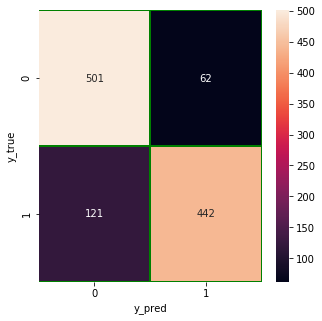

In [56]:
#confusion matrix visualization
import seaborn as sns
import matplotlib.pyplot as plt

f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(lr_conf_mat,annot=True,linewidths=0.7,linecolor="green",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# Adaboost-LDA

In [57]:
from sklearn.ensemble import AdaBoostClassifier

In [58]:
# Create adaboost classifer object
adaboost = AdaBoostClassifier(n_estimators=100,
                         learning_rate=1)



In [59]:
adaboost.fit(X_train_lda, y_train)

adaboost_prediction = cross_val_predict(adaboost, X, y, cv=5)

In [60]:
np.random.seed(42)
cv_acc = cross_val_score(adaboost, X, y, cv=5, scoring="accuracy")
print(f"The cross-validated accuracy is: {np.mean(cv_acc):.3f}%")

The cross-validated accuracy is: 0.912%


In [61]:
np.random.seed(42)
cv_precision = cross_val_score(adaboost, X, y, cv=5, scoring="precision")
print(f"The cross-validated precision is: {np.mean(cv_precision):.3f}")

The cross-validated precision is: 0.960


In [62]:
np.random.seed(42)
cv_recall = cross_val_score(adaboost, X, y, cv=5, scoring="recall")
print(f"The cross-validated recall is: {np.mean(cv_recall):.3f}")

The cross-validated recall is: 0.861


In [63]:
np.random.seed(42)
cv_f1 = cross_val_score(adaboost, X, y, cv=5, scoring="f1")
print(f"The cross-validated F1 score is: {np.mean(cv_f1):.3f}")

The cross-validated F1 score is: 0.906


In [64]:
from sklearn.metrics import confusion_matrix
adaboost_conf_mat = confusion_matrix(y, adaboost_prediction)
print(adaboost_conf_mat)

[[542  21]
 [ 78 485]]


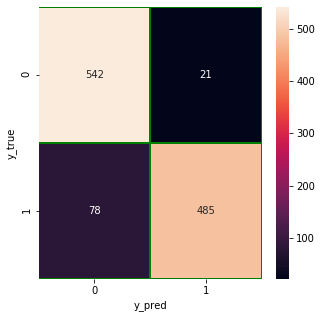

In [65]:
#confusion matrix visualization
import seaborn as sns
import matplotlib.pyplot as plt

f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(adaboost_conf_mat,annot=True,linewidths=0.7,linecolor="green",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [66]:
# Import the classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import roc_curve, roc_auc_score

# Instantiate the classfiers and make a list
classifiers = [LogisticRegression(random_state=1234), 
               AdaBoostClassifier(n_estimators=50,
                         learning_rate=1), 
               KNeighborsClassifier(), 
               RandomForestClassifier(random_state=1234)]


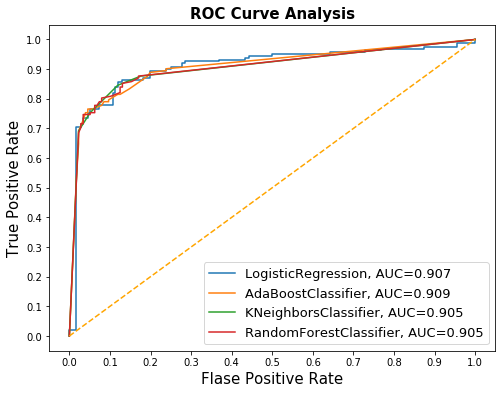

In [67]:

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train_lda, y_train)
    yproba = model.predict_proba(X_test_lda)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)
#Plot the figure
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()